# This project looks at 2016 US election data, followed by donor data.

Several questions will be explored based on the results of political polls.

    1.) Who was being polled and what was their party affiliation?
    2.) Did the poll results favor Trump or Clinton?
    3.) How did voter sentiment change over time?
    4.) Can we see an effect in the polls from the debates?

In [1]:
from __future__ import division

# For data
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
# Use to grab data from the web(HTTP capabilities)
import requests

# Use StringIO to work with the csv file, the DataFrame will require a .read() method
from io import StringIO

In [3]:
# Obtain the 2016 US General Election Data
url = "https://elections.huffingtonpost.com/pollster/2016-general-election-trump-vs-clinton.csv"

source = requests.get(url).text
poll_data = StringIO(source)

In [4]:
poll_df = pd.read_csv(poll_data)
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1522 entries, 0 to 1521
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Pollster                1522 non-null   object 
 1   Start Date              1522 non-null   object 
 2   End Date                1522 non-null   object 
 3   Entry Date/Time (ET)    1522 non-null   object 
 4   Number of Observations  1013 non-null   float64
 5   Population              1522 non-null   object 
 6   Mode                    1522 non-null   object 
 7   Trump                   1522 non-null   float64
 8   Clinton                 1522 non-null   float64
 9   Other                   1098 non-null   float64
 10  Undecided               1460 non-null   float64
 11  Pollster URL            1522 non-null   object 
 12  Source URL              1522 non-null   object 
 13  Partisan                1522 non-null   object 
 14  Affiliation             1522 non-null   

In [5]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,https://elections.huffingtonpost.com/pollster/...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,NaN,1


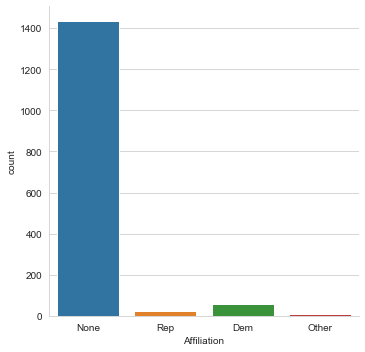

In [6]:
# See the affiliation
sns.catplot('Affiliation',data=poll_df,kind='count')

# Most of the pollsters are not affiliated, while there are more pollsters affiliated to democratic party as compared to republican party.

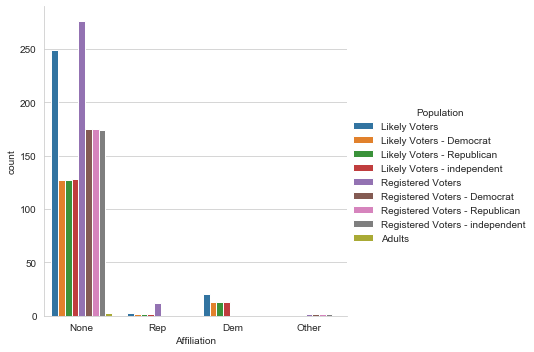

In [7]:
# See the affiliation by population
sns.catplot('Affiliation',data=poll_df,hue='Population',kind='count')

# Looks like majority are likely voters and registered voters, so should be a good representation of the populations polled

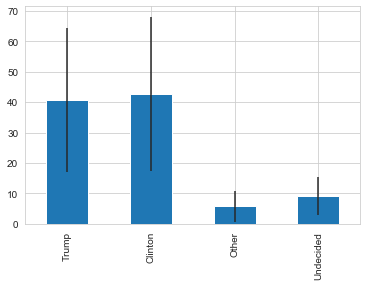

In [8]:
# Find out the average of support for each candidate
avg = pd.DataFrame(poll_df.mean())
avg.drop(['Number of Observations', 'Question Iteration'], axis = 0, inplace =True)

# Find out the standard deviation of support for each candidate
std = pd.DataFrame(poll_df.std())
std.drop(['Number of Observations', 'Question Iteration'], axis = 0, inplace =True)

# Plot the bar graph for visualization
avg.plot(yerr = std, kind = 'bar', legend = False)

The polls seem to be quite close to each other.

In [9]:
# Concat a dataframe with both avg and std
poll_avg = pd.concat([avg,std], axis = 1)
poll_avg.columns = ['Average','STD']
poll_avg

,Average,STD
Trump,40.643890,23.566390
Clinton,42.733903,25.298731
Other,5.806011,5.009533
Undecided,9.315068,6.253118


In [10]:
# Review the poll_df
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,https://elections.huffingtonpost.com/pollster/...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,NaN,1


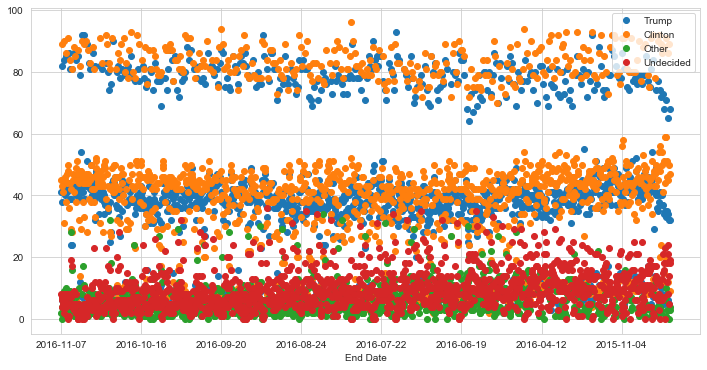

In [11]:
poll_df.plot(x = 'End Date', y = ['Trump','Clinton','Other','Undecided'],marker = 'o',linestyle = '', figsize = (12,6))

# Interesting to see that both have quite similar supports all the way over time.
# There are two sections of points, while one section gives each candidate about over 40% support, the other section gives each about 80% support. 
# The latter section could contain pollsters that are biased towards either one of candidates.

In [12]:
poll_df['Difference'] = (poll_df.Trump - poll_df.Clinton)/100

In [13]:
# Set as_index=Flase to keep the 0,1,2,... index. Then we'll take the mean of the polls on that day.
poll_df_daily = poll_df.groupby(['Start Date'],as_index=False).mean()

# Let's go ahead and see what this looks like
poll_df_daily.head()

,Start Date,Number of Observations,Trump,Clinton,Other,Undecided,Question Iteration,Difference
0,2015-05-19,1046.00,34.25,48.75,2.5,14.00,1.0,-0.1450
1,2015-06-20,420.75,35.00,47.25,NaN,17.75,1.0,-0.1225
2,2015-06-21,1005.00,34.00,51.00,3.0,12.00,1.0,-0.1700
3,2015-06-26,890.00,36.75,57.00,6.0,0.00,1.0,-0.2025
4,2015-07-09,499.25,35.25,49.50,NaN,16.00,1.0,-0.1425


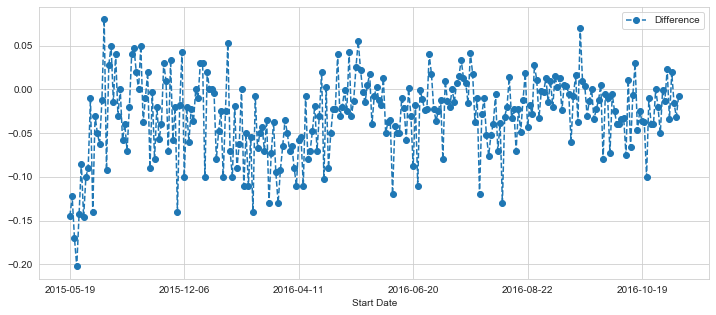

In [14]:
poll_df_daily.plot(x = 'Start Date', y = 'Difference', marker = 'o', linestyle = '--', figsize = (12,5))

# The general trend is that Clinton has a clearer adavantage over Trump at the beginning, and the difference starts to diminish over time.
# It would be interesting to see the change after each presidential debate. The three debates were on 26 Sep, 9 Oct and 19 Oct.

In order to find where to set the x limits for the figure we need to find out where the index for the month of October in 2012 is. Here's a simple for loop to find that row. Note, the string format of the date makes this difficult to do without using a lambda expression or a map.

In [15]:
# Set row count and xlimit list
row_in = 0
oct_period = []

# Cycle through dates until 2012-10 is found, then print row index
for date in poll_df_daily['Start Date']:
    if date[0:7] == '2016-10':
        oct_period.append(row_in)
        row_in +=1
    else:
        row_in += 1
        
print(min(oct_period))
print(max(oct_period))

232
262


So 2016-09-26 should be index 232 - 5, 2016-10-09 should be 232 + 8, 2016-10-19 should be 232 + 18

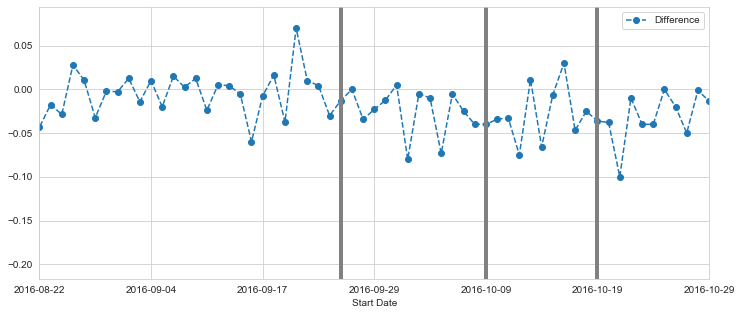

In [16]:
# Start with original figure
poll_df_daily.plot(x = 'Start Date', y = 'Difference', marker = 'o', linestyle = '--', figsize = (12,5),xlim = (200,260))

# Now add the debate markers
plt.axvline(x=232-5, linewidth=4, color='grey')
plt.axvline(x=232+8, linewidth=4, color='grey')
plt.axvline(x=232+18, linewidth=4, color='grey')

# It looks like the three debates did not affect much about the pattern of fluctuation on difference of support.

However, it is worth of noting that Trump had a generally decresing trend of support between 1st and 2nd debate, and a generally increasing trend of support between 2nd and 3rd debate

# Donor Data Set

Now take a look at a data set consisting of information on donations to the federal campaign. Retrive the donor info from http://disq.us/url?url=http%3A%2F%2Fdownload.datasciencedojo.com%2Findividual_contribution.csv%3AAL0fhVprmIe3fCorGh8rE86dGsg&cuid=3358770

The questions we will be trying to answer while looking at this Data Set is:

    1.) How much was donated and what was the average donation?
    2.) What were the demographics of the donors?
    3.) Is there a pattern to donation amounts?
    

In [17]:
donor_df = pd.read_csv('D:\Academics\Data\individual_contribution.csv')

C:\Users\z9906\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (5,10,15,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [18]:
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12381750 entries, 0 to 12381749
Data columns (total 21 columns):
 #   Column           Dtype  
---  ------           -----  
 0   cmte_id          object 
 1   amndt_ind        object 
 2   rpt_tp           object 
 3   transaction_pgi  object 
 4   image_num        float64
 5   transaction_tp   object 
 6   entity_tp        object 
 7   name             object 
 8   city             object 
 9   state            object 
 10  zip_code         object 
 11  employer         object 
 12  occupation       object 
 13  transaction_dt   float64
 14  transaction_amt  int64  
 15  other_id         object 
 16  tran_id          object 
 17  file_num         int64  
 18  memo_cd          object 
 19  memo_text        object 
 20  sub_id           float64
dtypes: float64(3), int64(2), object(16)
memory usage: 1.9+ GB


In [19]:
donor_df.head()

,cmte_id,amndt_ind,rpt_tp,transaction_pgi,image_num,transaction_tp,entity_tp,name,city,state,...,employer,occupation,transaction_dt,transaction_amt,other_id,tran_id,file_num,memo_cd,memo_text,sub_id
0,C00004606,N,M4,P,1.595112e+10,15,IND,"ARNOLD, ROBERT",MCPHERSON,KS,...,SELF,OPTOMETRIST,3102015.0,1000,NaN,SA11AI.20747,1002259,NaN,NaN,4.041320e+18
1,C00004606,N,M4,P,1.595112e+10,15,IND,"BICKLE, DON",HAYS,KS,...,RETIRED,RETIRED,3302015.0,1000,NaN,SA11AI.20772,1002259,NaN,NaN,4.041320e+18
2,C00004606,N,M4,P,1.595112e+10,15,IND,"ROSSMAN, RICHARD",OLATHE,KS,...,CRAWFORD SALES COMPANY,BUSINESSMAN,3302015.0,250,NaN,SA11AI.20759,1002259,NaN,NaN,4.041320e+18
3,C00452383,N,M4,P,1.595112e+10,15,IND,"LLEWELLYN, CHARLES",FREDERICK,MD,...,NaN,NaN,3112015.0,500,NaN,SA11AI.25088,1002261,NaN,NaN,4.041320e+18
4,C00452383,N,M4,P,1.595112e+10,15,IND,"TYNES, TIMOTHY MR.",VERO BEACH,FL,...,NaN,NaN,3022015.0,250,NaN,SA11AI.25074,1002261,NaN,NaN,4.041320e+18


The committe id contains information that could help to map to the candidate ip. However, the linkage data is not available now and it requires some data mining techniques. This could be updated in the future.

In [20]:
# Get the mean donation
don_mean = donor_df['transaction_amt'].mean()

# Get the std of the donation
don_std = donor_df['transaction_amt'].std()

print('The average donation was %.2f with a std of %.2f' %(don_mean,don_std))

The average donation was 285.15 with a std of 18417.85


In [21]:
# Let's make a Series from the DataFrame, use .copy() to avoid view errors
top_donor = donor_df['transaction_amt'].copy()

# Now sort it
top_donor.sort_values(inplace=True)

# Then check the Series
top_donor

388923       -226800
12295132     -105000
321145       -100200
321091       -100200
4186959      -100200
              ...   
7383954      8966466
921731      10000000
2879190     10000000
2525274     11000000
12300346    50000000
Name: transaction_amt, Length: 12381750, dtype: int64

Looks like there some negative values, as well as some huge donation amounts! The negative values are due to the FEC recording refunds as well as donations.

Analysis will be done on the positive donations.

In [22]:
# Get rid of the negative values
top_donor = top_donor[top_donor >0]

# Sort the Series
top_donor.sort_values(inplace=True)

# Look at the top 10 most common donations value counts
top_donor.value_counts().head(10)

25     1310175
50     1277636
100    1007874
10      813432
5       686474
15      667381
250     550757
27      400012
20      397975
500     371949
Name: transaction_amt, dtype: int64

# Here we can see that the top 10 most common donations ranged from 10 to 500 dollars.

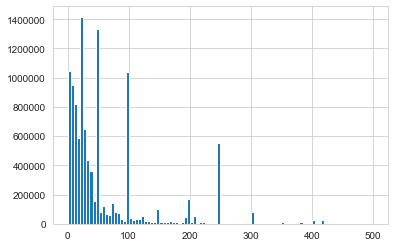

In [23]:
# Create a Series of the common donations limited to 2500
com_don = top_donor[top_donor < 500]

# Set a high number of bins to account for the non-round donations and check histogram for spikes.
com_don.hist(bins=100)

let's look at donations and who they came from (as far as occupation is concerned).

In [24]:
occupation_df = donor_df.pivot_table('transaction_amt',
                                    index='occupation',
                                    aggfunc = 'sum')

In [25]:
occupation_df.head()

,transaction_amt
occupation,
\tRETIRED,616
ABI PRODUCT MANAGEMENT,118
ACCOUNTING RESEARCH POLICY 1,69
ADMINISTRATION AND REAL ESTATE,81
AF AFT ARCHITECTURE SERVICES,225


In [26]:
occupation_df.shape

(245534, 1)

This seems too large a dataset to be analyzed on. Occupations titles with small total transaction amount should be filtered out.

In [27]:
# Set a cut off point at 1 milllion dollars of sum contributions
occupation_df = occupation_df[occupation_df.sum(1) > 10000000]

In [28]:
occupation_df

,transaction_amt
occupation,
ATTORNEY,146058752
C.E.O.,16170308
CEO,121659261
CHAIRMAN,97144819
CHAIRMAN & CEO,24329163
CHIEF EXECUTIVE OFFICER,15344772
CONSULTANT,43785156
DIRECTOR,18344295
ENGINEER,20103986


Now the size seems reasonable

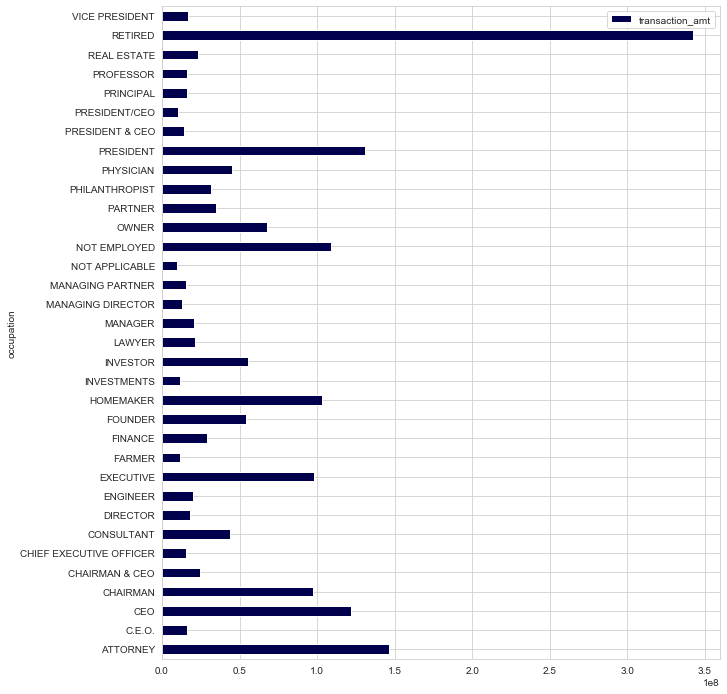

In [29]:
occupation_df.plot(kind='barh',figsize=(10,12),cmap='seismic')

Notice that CEO, C.E.O. and CHIEF EXECUTIVE OFFICER should be merged together.

President & CEO and President/CEO should also be merged together.

CHAIRMAN & CEO should be merged into CHAIRMAN.

INVESTMENTS should be merged into INVESTOR

In [30]:
# Set new ceo row as sum of the current three
occupation_df.loc['CEO'] = occupation_df.loc['CEO'] + occupation_df.loc['C.E.O.'] + occupation_df.loc['CHIEF EXECUTIVE OFFICER']
# Drop CEO
occupation_df.drop(['C.E.O.','CHIEF EXECUTIVE OFFICER'],inplace=True)

# Set new President/CEO row as sum of the current two
occupation_df.loc['PRESIDENT/CEO'] = occupation_df.loc['PRESIDENT/CEO'] + occupation_df.loc['PRESIDENT & CEO']
# Drop President & CEO
occupation_df.drop('PRESIDENT & CEO', inplace = True)

# Set new CHAIRMAN row as sum of the current two
occupation_df.loc['CHAIRMAN'] = occupation_df.loc['CHAIRMAN'] + occupation_df.loc['CHAIRMAN & CEO']
# Drop CHAIRMAN & CEO
occupation_df.drop('CHAIRMAN & CEO', inplace = True)

# Set new INVESTOR row as sum of the current two
occupation_df.loc['INVESTOR'] = occupation_df.loc['INVESTOR'] + occupation_df.loc['INVESTMENTS']
# Drop INVESTMENTS
occupation_df.drop('INVESTMENTS', inplace = True)


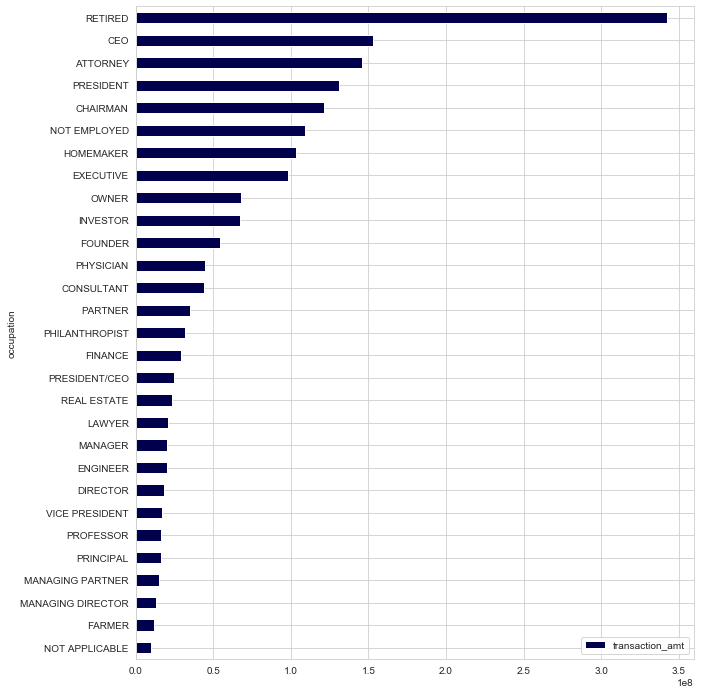

In [31]:
# Rank the occupation with highest total donation on top
occupation_df.sort_values(by='transaction_amt', ascending = True, inplace = True)

# Repeat the plot
occupation_df.plot(kind='barh',figsize=(10,12),cmap='seismic')

# It is interesting to find out that donors with most total donation came as retired people.

Following by CEO, Attorney, President and Chairman, which are of high portfolio.

Surprisingly, homemakers are among the top 10 donor occupation with highest total donation.